In [1]:
options(repr.plot.width=6, repr.plot.height=4)

# Data Visualization
---
Data visualization involves the creation and study of the visual representation of data. To communicate information clearly and efficiently, data visualization uses statistical graphics, plots, information graphics and other tools. Effective visualization helps users analyze and reason about data and evidence. It makes complex data more accessible, understandable and usable.

`ggplot2` is the most popular package for data visualization in R. Created by Hadley Wickham, `ggplot2` is an implementation of Leland Wilkinson's *Grammar of Graphics*— a general scheme for data visualization which breaks up graphs into semantic components such as scales and layers. `ggplot2` can serve as a replacement for the base graphics in R.


## Overview of `ggplot2`

In this notebook we will focus on `ggplot2` and will try to cover its main functionalities. If you have followed the **Setup** notebook you should already have `ggplot2` installed since it's a part of `tidyverse` library. Before being able to use a package we need to first load it into the environment by

> `library(ggplot2)`

Alternatively one can load the entire `tidyverse` to include all of its core packages:

In [2]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.0.0     ✔ purrr   0.2.5
✔ tibble  1.4.2     ✔ dplyr   0.7.6
✔ tidyr   0.8.1     ✔ stringr 1.3.1
✔ readr   1.1.1     ✔ forcats 0.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


These 8 packages are used in almost every data analysis in R. The last two lines are warning that you can ignore for now.

### First graph
Let's use one of the datasets that come with `ggplot2` to make a graph and answer a simple question. 

**Question**: Do cars with big engines use more fuel than cars with small engines?

**dataset**: `mpg` - contains fuel economy data from 1999 and 2008 for 38 popular models of car. 

Another way of calling a dataset that comes from a package is to specify the package name first followed by two colons, e.g.: `ggplot2::mpg`. This is optional, but a good practice for extra clarity if needed.

To see the content of `mpg` you can simply type
> `mpg`

in the console (or a notebook cell). To avoid getting too many rows back in the notebook I use `head()` function from base R to only load the first few rows. If you are using RStudio then by just typing `mpg` you should get the right amount of output that fits in your screen, it's because `mpg` is a `tibble`, we will learn more about `tibbles` later.

In [3]:
head(mpg)

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact


Among the variables in `mpg` are
* `displ`, a car's engine size, in litres.
* `hwy`, a car's fuel efficiency on the highway, in miles per gallon (mpg). A car with a low fuel efficiency consumes more fuel than a car with a high fuel efficiency when they travel the same distance.

To access the help page and find out more about this data frame use `?mpg` command or press **F1**. A data frame is a rectangular collection of variables (in the columns) and observations (in the rows).

#### Creating a ggplot
To plot `mpg`, run this code to put `displ` on the x-axis and `hwy` on the y-axis:

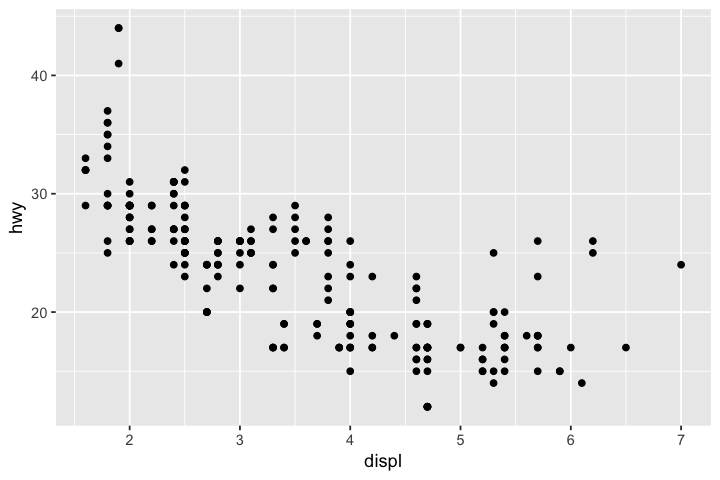

In [4]:
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy))

The plot shows a negative relationship between engine size (`displ`) and fuel efficiency (`hwy`). In other words, cars with big engines use more fuel.

With `ggplot2`, you begin a plot with the function `ggplot()`. `ggplot()` creates a coordinate system that you can add layers to. The first argument of `ggplot()` is the dataset to use in the graph. `ggplot(data = mpg)` creates an empty graph.

You complete your graph by adding one or more layers to `ggplot()`. The function `geom_point()` adds a layer of points to your plot, which creates a scatterplot. `ggplot2` comes with many geom functions that each add a different type of layer to a plot. You'll learn a whole bunch of them throughout this notebook.

Each geom function in `ggplot2` takes a `mapping` argument. This defines how variables in your dataset are mapped to visual properties. The `mapping` argument is always paired with `aes()`, and the `x` and `y` arguments of `aes()` specify which variables to map to the x and y axes. `ggplot2` looks for the mapped variable in the `data` argument, in this case, `mpg`.

### The grammar of graphics
As mentioned earlier `ggplot2` breaks up graphs into semantic components such as scales and layers. For instance the graph we just plotted consists of the following three layers
<img src="../png/3-layers-ggplot.png" width="400px" align="center">

These three layers are the minimum requirements for the data to be visualized.

**Data -**
The source of information to be plotted. 
> `ggplot(data = mpg)`

This statement by itself would result in an empty canvas. In order to show the points we need the other two layers.

**Aestetics -**
For specifying the attributes of the plot. The aesthetics mapping describe how variables in the data are mapped to visual properties of the geometric objects. The `mapping` argument is always paired with `aes()`.
> `mapping = aes(x = displ, y = hwy)`

**Geometrics -**
Specifies the geometric object to be used for data visualization. For the example above we have used `geom_point()` to show the data points in a scatterplot.
> ```ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy))``` 

#### A graphing template
We can use the following template which represents these 3 layers. Replace the bracketed sections in the code below with a dataset, a geom function, or a collection of mappings:
> ```ggplot(data = <DATA>) + 
  <GEOM_FUNCTION>(mapping = aes(<MAPPINGS>))```

##### There are four more layers in `ggplot2`#####
<img src="../png/layers-of-ggplot.png" width="400px" align="center">

**Facets -**
Allow us to visualize multiple groups of the same data within one canvas. For example, in our example one could group the cars by their `drv`
* 4: Four-wheel drive
* f: Front-wheel drive
* r: Rear-wheel drive

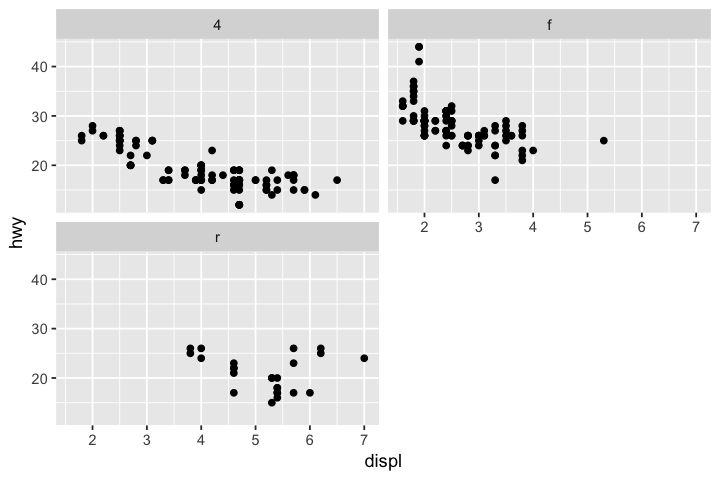

In [5]:
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy)) + 
  facet_wrap(~ drv, nrow = 2)

**Statistics**
This layer is to summarize or transform the data before plotting it. For instance we can fit a line to the previous plot by `geom_smooth()`

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


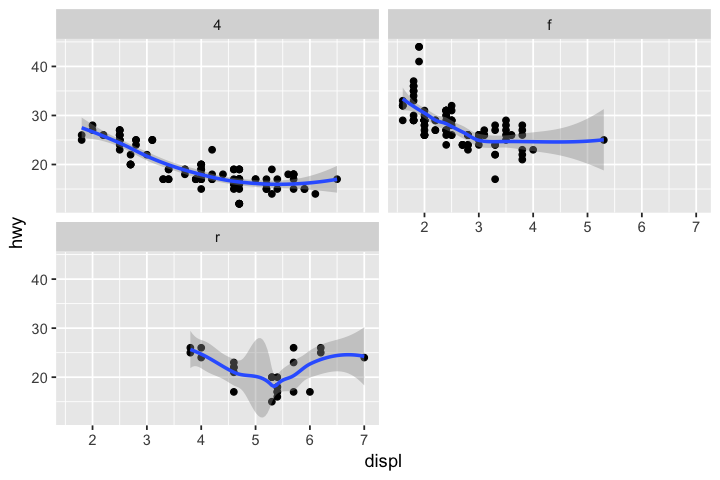

In [6]:
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy)) + 
  facet_wrap(~ drv, nrow = 2) +
  geom_smooth(mapping = aes(x = displ, y = hwy))

**Coordinates**


`geom_smooth()` using method = 'loess' and formula 'y ~ x'


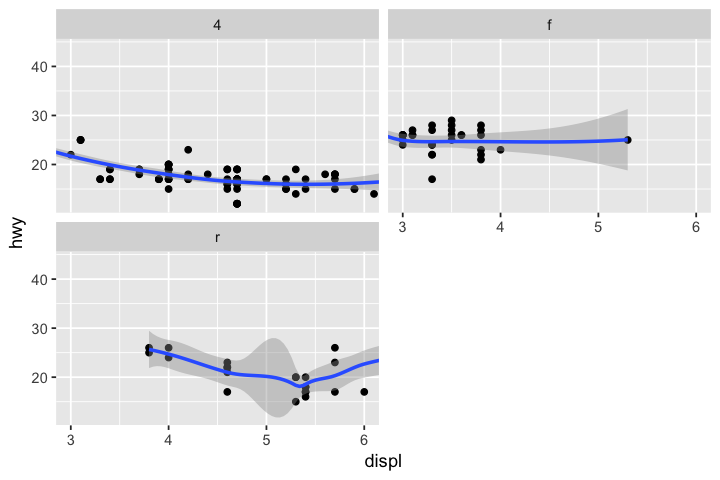

In [7]:
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy)) + 
  facet_wrap(~ drv, nrow = 2) +
  geom_smooth(mapping = aes(x = displ, y = hwy)) +
  coord_cartesian(xlim = c(3, 6))

**Themes**


`geom_smooth()` using method = 'loess' and formula 'y ~ x'


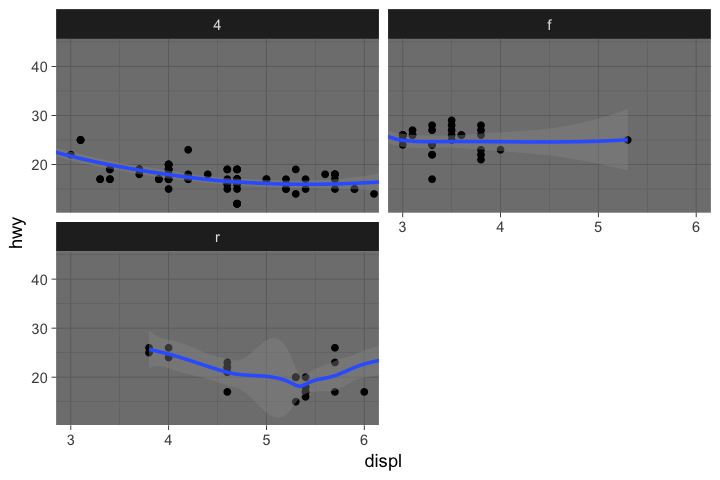

In [8]:
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy)) + 
  facet_wrap(~ drv, nrow = 2) +
  geom_smooth(mapping = aes(x = displ, y = hwy)) +
  coord_cartesian(xlim = c(3, 6)) +
  theme_dark()

---
### Exercise 1
How many rows are in `mpg`? How many columns?

In [9]:
# Your answer goes here

---
### Exercise 2
What does the `drv` variable describe? Read the help for `?mpg` to find out.

In [10]:
# Your answer goes here

---
### Exercise 3
Make a scatterplot of `hwy` vs `cyl`.

In [11]:
# Your answer goes here

---
Now that we have a general idea of all the seven layers of `ggplot2` let's take a deeper dive into some of them.

## Aesthetics
Looking back at the first graph we made, we see that there are a few car models that despite their engine size are relatively efficient (~25 mpg) and seem to fall out of the linear trend (blue circles). How can we explain these cars? 

<img src="../png/mpg_outliers.png" width="600px" align="left">  

We might be able to explain it by their class attribute, after all not all large engine vehicles are SUV. Let's use `class` column to color the points. To do this we need to map this field to an **aesthetic**. An aesthetic is a visual property of the objects in our plot. Aesthetics include things like size, shape, or the color of our points.

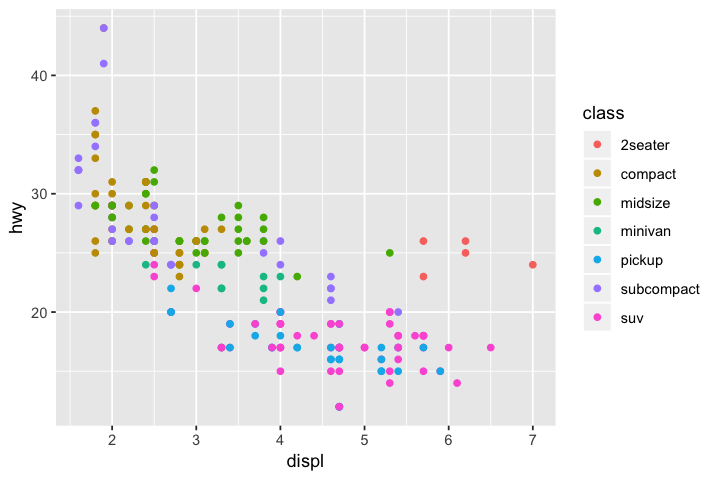

In [12]:
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy, color = class))

The colors reveal that many of the unusual points are two-seater cars. These sports cars have large engines like SUVs and pickup trucks, but small bodies like midsize and compact cars, which improves their gas mileage.

We can set the scale color:

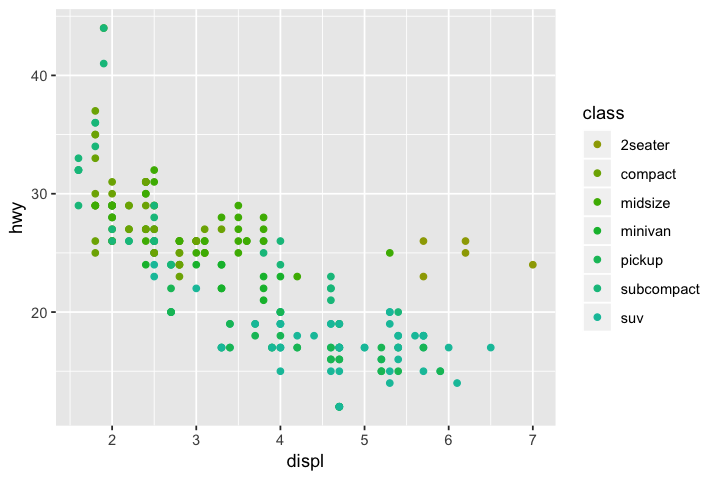

In [13]:
# Change range of hues used
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy, color = class)) +
  scale_color_hue(h = c(90, 180))

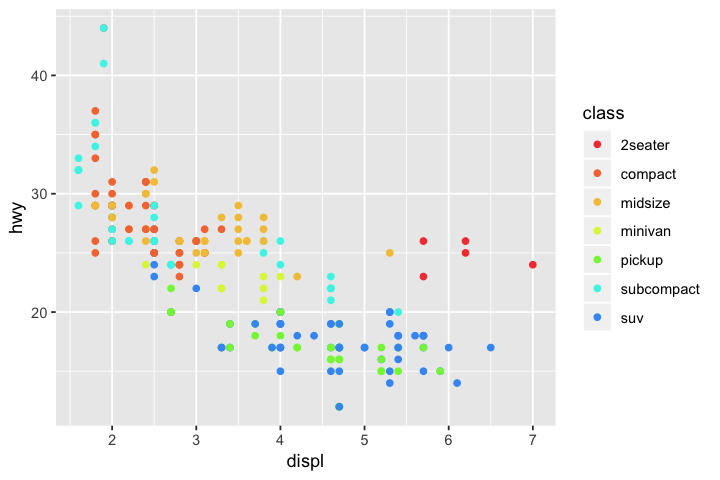

In [14]:
# Set manually 
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy, color = class)) +
  scale_color_manual(values = c("#f44242", "#f47741", "#f4c441", "#dff441", "#82f441", "#41f4e8", "#419af4"))

You can also set the aesthetic properties of your geom manually. For example, we can make all of the points in our plot blue:

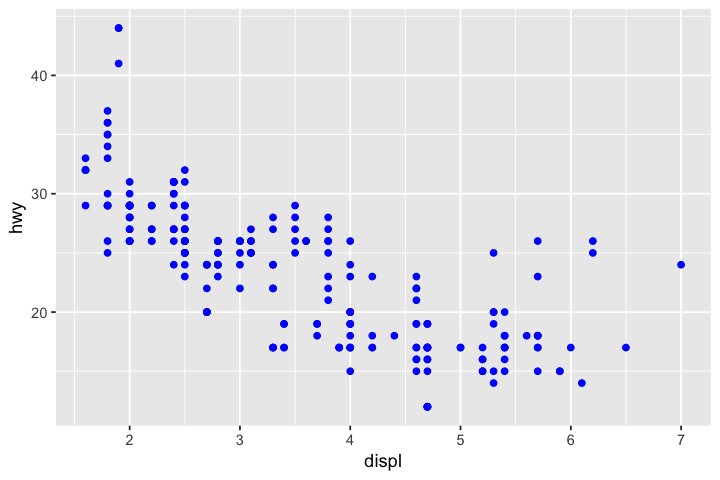

In [15]:
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy), color = "blue")

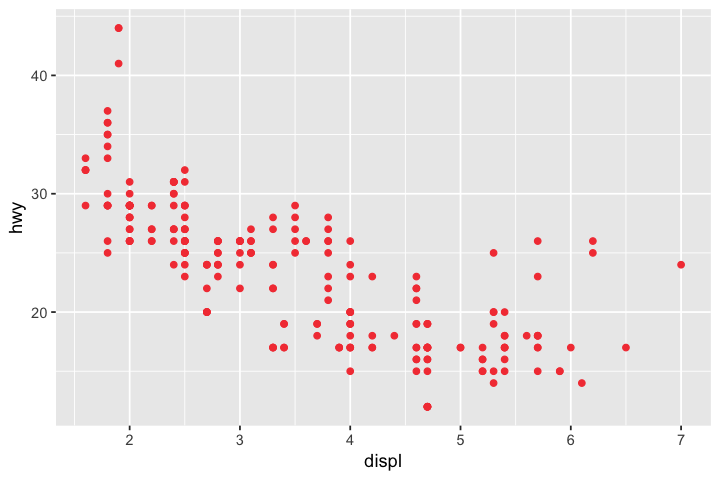

In [16]:
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy), color = "#f44242") # hex coloring

In [17]:
scale_color_hue

function (..., h = c(0, 360) + 15, c = 100, l = 65, h.start = 0, 
    direction = 1, na.value = "grey50", aesthetics = "colour") 
{
    discrete_scale(aesthetics, "hue", hue_pal(h, c, l, h.start, 
        direction), na.value = na.value, ...)
}
<bytecode: 0x7ff17a358ee8>
<environment: namespace:ggplot2>

---
### Exercise 4
Besides `color` (aka `colour`), one could also map `class` to other aesthetics such as `shape`, `size`, and `alpha`. As a practice, using the above code try to regenerate the plot experimenting with different mappings.

In [18]:
# Your answer goes here

---
### Exercise 5
What's gone wrong with this code? Why are the points not blue?

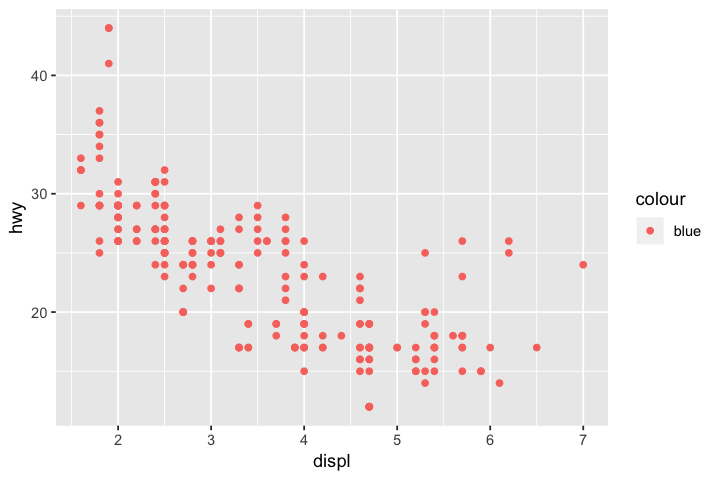

In [19]:
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy, color = "blue"))

In [20]:
# Your answer goes here

---
### Exercise 6
Which variables in `mpg` are categorical? Which variables are continuous? (Hint: type `?mpg` to read the documentation for the dataset). How can you see this information when you run `mpg`?

In [21]:
# Your answer goes here

---
### Exercise 7
Map a continuous variable to `color`, `size`, and `shape`. How do these aesthetics behave differently for categorical vs. continuous variables?

In [22]:
# Your answer goes here

---
### Exercise 8
What happens if you map the same variable to multiple aesthetics?

In [23]:
# Your answer goes here

---
### Exercise 9
What does the `stroke` aesthetic do? What shapes does it work with? (Hint: use `?geom_point`)

In [24]:
# Your answer goes here

---
### Exercise 10
What happens if you map an aesthetic to something other than a variable name, like `aes(color = displ < 5)`?

In [25]:
# Your answer goes here

---
## Facets layer
One way to add additional variables is with aesthetics. Another way, particularly useful for categorical variables, is to split your plot into facets, subplots that each display one subset of the data.

To facet your plot by a single variable, use `facet_wrap()`. The first argument of `facet_wrap()` should be a formula, which you create with ~ followed by a variable name. The variable that you pass to `facet_wrap()` should be discrete.

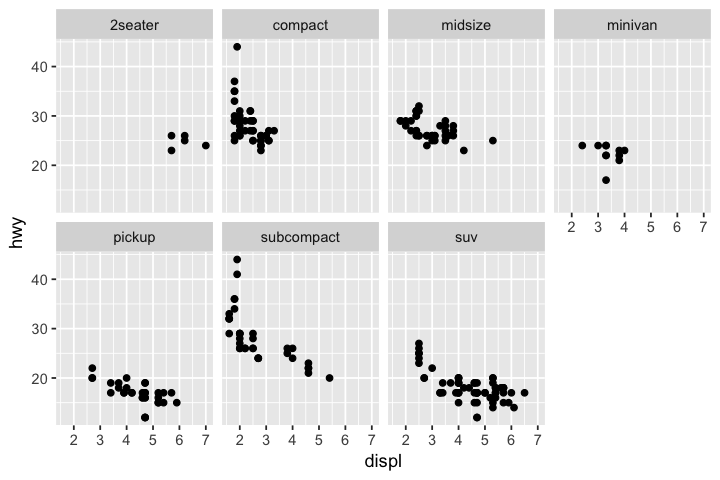

In [26]:
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy)) + 
  facet_wrap(~ class, nrow = 2)

To facet your plot on the combination of two variables, add `facet_grid()` to your plot call. The first argument of `facet_grid()` is also a formula. This time the formula should contain two variable names separated by a ~.

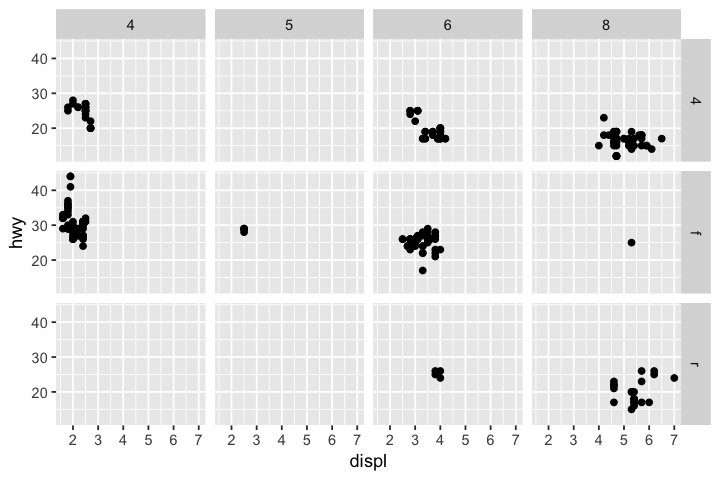

In [27]:
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy)) + 
  facet_grid(drv ~ cyl)

---
### Exercise 11
Read `?facet_wrap`. What does `nrow` do? What does `ncol` do? What other options control the layout of the individual panels? Why doesn't `facet_grid()` have `nrow` and `ncol` arguments?

To answer these questions try to modify the previous two plots by changing the parameters.

In [28]:
# Your answer goes here

---
## Geometries layer
How are these two plots similar?

<img src="../png/two_object_plot_scatter_smooth.png" width="900px" align="center">

Both plots contain the same x variable, the same y variable, and both describe the same data. But the plots are not identical. Each plot uses a different visual object to represent the data. In ggplot2 syntax, we say that they use different **geoms**.

A **geom** is the geometrical object that a plot uses to represent data. People often describe plots by the type of geom that the plot uses. For example, bar charts use bar geoms, line charts use line geoms, boxplots use boxplot geoms, and so on. Scatterplots break the trend; they use the point geom. The plot on the left uses the point geom, and the plot on the right uses the smooth geom, a smooth line fitted to the data. To change the geom in your plot, change the geom function that you add to `ggplot()`. For instance, to make the plots above, you can use this code:

Left
> ```ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy))```
  
Right
> ```ggplot(data = mpg) + 
  geom_smooth(mapping = aes(x = displ, y = hwy))```

Every geom function in ggplot2 takes a `mapping` argument. However, not every aesthetic works with every geom.

A few examples:

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


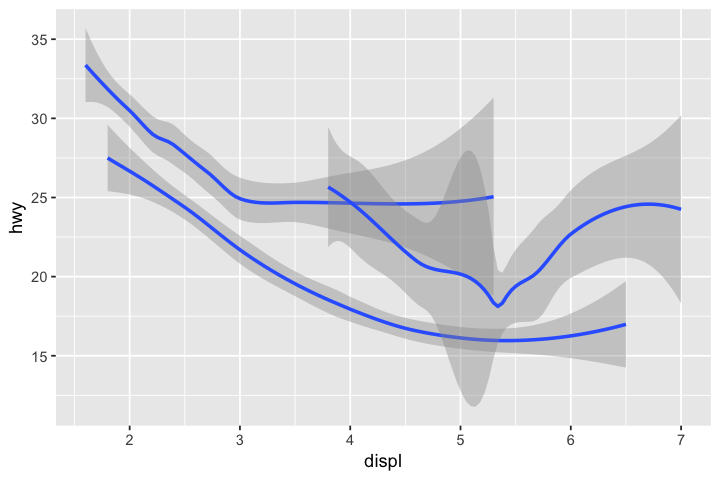

In [29]:
ggplot(data = mpg) +
  geom_smooth(mapping = aes(x = displ, y = hwy, group = drv))

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


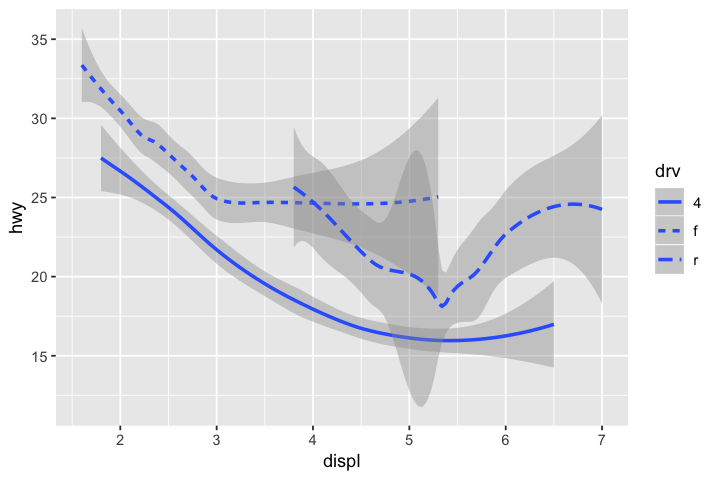

In [30]:
ggplot(data = mpg) + 
  geom_smooth(mapping = aes(x = displ, y = hwy, linetype = drv))

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


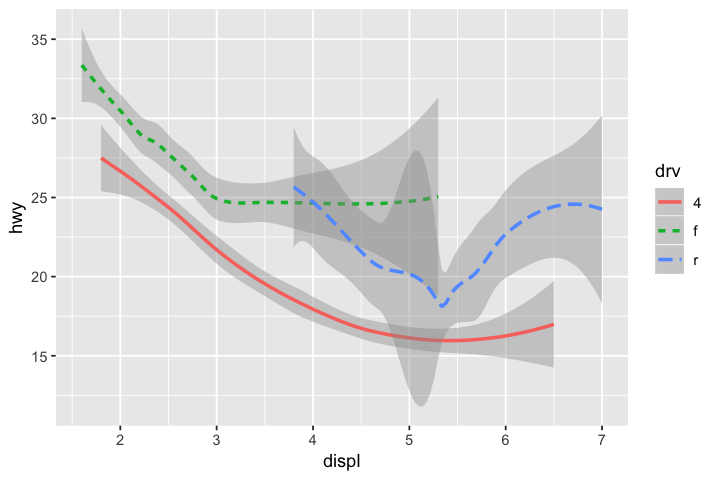

In [31]:
ggplot(data = mpg) +
  geom_smooth(
    mapping = aes(x = displ, y = hwy, color = drv, linetype = drv)
  )

To display multiple geoms in the same plot, add multiple geom functions to ggplot().

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


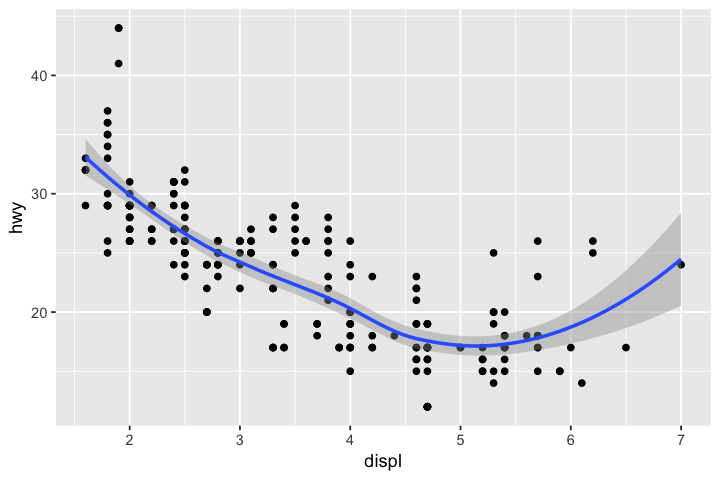

In [32]:
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy)) +
  geom_smooth(mapping = aes(x = displ, y = hwy))

---
### Exercise 12
Write the code to produce the following plot

<img src="../png/exercise12-ggplot.png" width="720px" align="left">

In [33]:
# Your answer goes here

---
### Exercise 13
What does show.legend = FALSE do? Show with an example

In [34]:
# Your answer goes here

---
### Exercise 14
Will these two graphs look different? Why/why not?
> ```ggplot(data = mpg, mapping = aes(x = displ, y = hwy)) + 
  geom_point() + 
  geom_smooth()```
  
> ```ggplot() + 
  geom_point(data = mpg, mapping = aes(x = displ, y = hwy)) + 
  geom_smooth(data = mpg, mapping = aes(x = displ, y = hwy))```

In [35]:
# Your answer goes here

---
### Exercise 15
Recreate the R code necessary to generate the following graphs:

<img src="../png/exercise12-ggplot.png" width="700px" align="center">

In [36]:
# Your answer goes here

---
## Statistics layer
Next, let's take a look at a bar chart. Bar charts seem simple, but they are interesting because they reveal something subtle about plots. Consider a basic bar chart, as drawn with `geom_bar()`. The following chart displays the total number of diamonds in the `diamonds` dataset, grouped by `cut`. The `diamonds` dataset comes in ggplot2 and contains information about ~54,000 diamonds, including the `price`, `carat`, `color`, `clarity`, and `cut` of each diamond. The chart shows that more diamonds are available with high quality cuts than with low quality cuts.

In [37]:
head(diamonds)

carat,cut,color,clarity,depth,table,price,x,y,z
0.23,Ideal,E,SI2,61.5,55,326,3.95,3.98,2.43
0.21,Premium,E,SI1,59.8,61,326,3.89,3.84,2.31
0.23,Good,E,VS1,56.9,65,327,4.05,4.07,2.31
0.29,Premium,I,VS2,62.4,58,334,4.20,4.23,2.63
0.31,Good,J,SI2,63.3,58,335,4.34,4.35,2.75
0.24,Very Good,J,VVS2,62.8,57,336,3.94,3.96,2.48


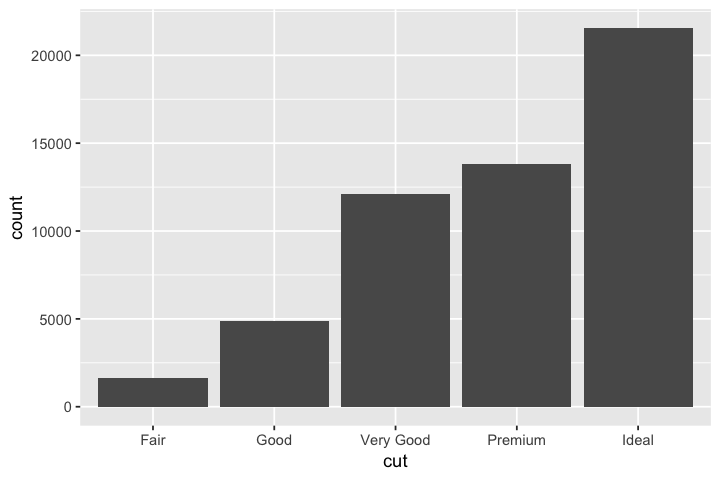

In [38]:
ggplot(data = diamonds) + 
  geom_bar(mapping = aes(x = cut))

On the x-axis, the chart displays `cut`, a variable from `diamonds`. On the y-axis, it displays count, but count is not a variable in diamonds! The algorithm used to calculate new values for a graph (count here) is called a **stat**, short for statistical transformation.

You can learn which stat a geom uses by inspecting the default value for the `stat` argument. For example, `?geom_bar` shows that the default value for `stat` is "count", which means that `geom_bar()` uses `stat_count()`.

You can generally use geoms and stats interchangeably. For example, you can recreate the previous plot using `stat_count()` instead of `geom_bar()`:

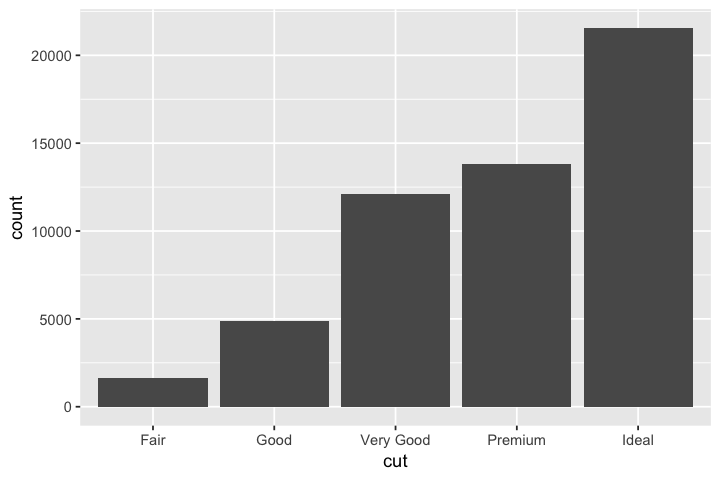

In [39]:
ggplot(data = diamonds) + 
  stat_count(mapping = aes(x = cut))

This works because every geom has a default stat; and every stat has a default geom. This means that you can typically use geoms without worrying about the underlying statistical transformation. There are three reasons you might need to use a stat explicitly:

**1)** You might want to override the default stat.

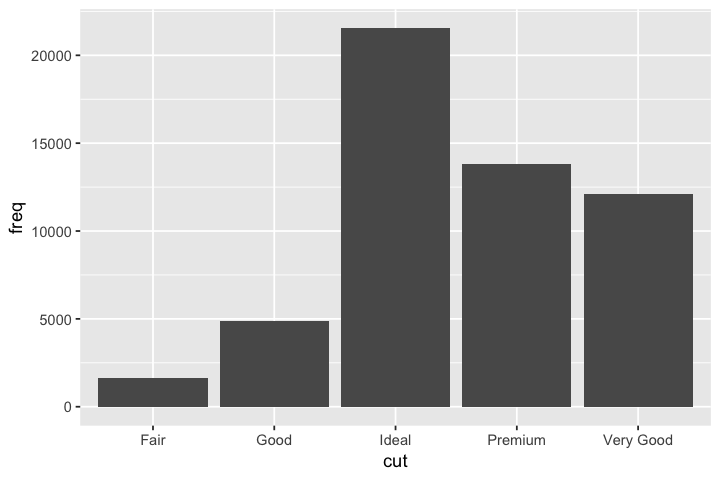

In [40]:
demo <- tribble(
  ~cut,         ~freq,
  "Fair",       1610,
  "Good",       4906,
  "Very Good",  12082,
  "Premium",    13791,
  "Ideal",      21551
)

ggplot(data = demo) +
  geom_bar(mapping = aes(x = cut, y = freq), stat = "identity")

**2)** You might want to override the default mapping from transformed variables to aesthetics. For example, you might want to display a bar chart of proportion, rather than count:

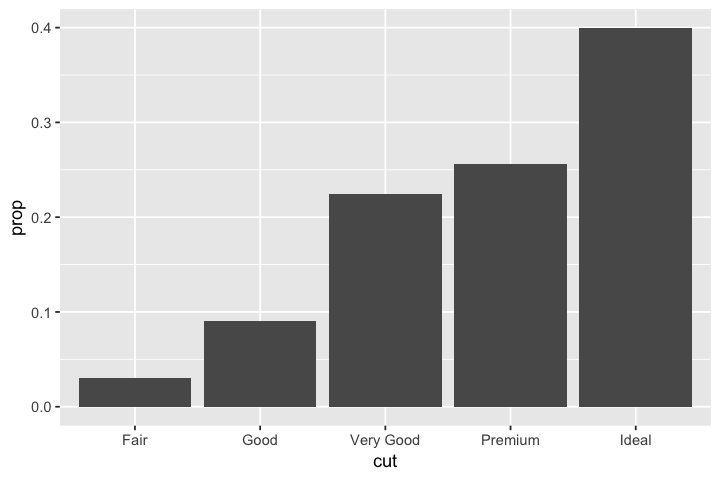

In [41]:
ggplot(data = diamonds) + 
  geom_bar(mapping = aes(x = cut, y = ..prop.., group = 1))

If `group` is not set to 1, then all the bars have `prop == 1`. The function `geom_bar()` assumes that the groups are equal to the `x` values, since the `stat` computes the counts within the group.

**3)** You might want to draw greater attention to the statistical transformation in your code. For example, you might use stat_summary(), which summarizes the y values for each unique x value, to draw attention to the summary that you're computing:

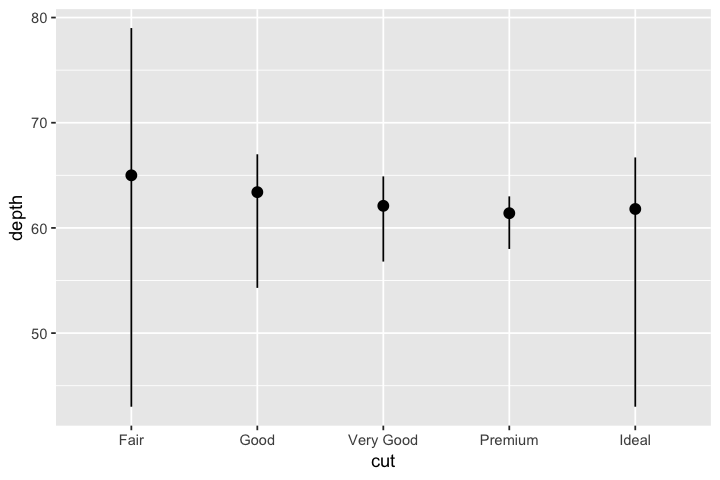

In [42]:
ggplot(data = diamonds) + 
  stat_summary(
    mapping = aes(x = cut, y = depth),
    fun.ymin = min,
    fun.ymax = max,
    fun.y = median
  )

---
### Exercise 16
What is the default geom associated with `stat_summary()`? How could you rewrite the previous plot to use that geom function instead of the stat function?

In [44]:
# Your answer goes here

---
### Exercise 17
What variables does `stat_smooth()` compute? What parameters control its behavior?

In [45]:
# Your answer goes here

# Additional Recourses
* *ggplot2-cheatsheet.pdf* in the cheatsheets directory
* Hex color
    * Simply google "hex color picker" and use Google's tool
    * There are many other online sources, a highly customizable tool can be found in [Mozilla](https://developer.mozilla.org/en-US/docs/Web/CSS/CSS_Colors/Color_picker_tool)
